<a href="https://colab.research.google.com/github/Xaled99/bisection-method-project/blob/main/bisection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BISECTION METHOD: f(x) = e^(-x) - x
Iteration  a          b          c          f(c)         Error     
----------------------------------------------------------------------
1          0.000000   1.000000   0.500000   0.106531     1.000000  
2          0.500000   1.000000   0.750000   -0.277633    0.500000  
3          0.500000   0.750000   0.625000   -0.089739    0.250000  
4          0.500000   0.625000   0.562500   0.007283     0.125000  
5          0.562500   0.625000   0.593750   -0.041498    0.062500  
6          0.562500   0.593750   0.578125   -0.017176    0.031250  
7          0.562500   0.578125   0.570312   -0.004964    0.015625  
8          0.562500   0.570312   0.566406   0.001155     0.007812  
9          0.566406   0.570312   0.568359   -0.001905    0.003906  
10         0.566406   0.568359   0.567383   -0.000375    0.001953  
11         0.566406   0.567383   0.566895   0.000390     0.000977  
12         0.566895   0.567383   0.567139   0.000007     0.000488  
13       

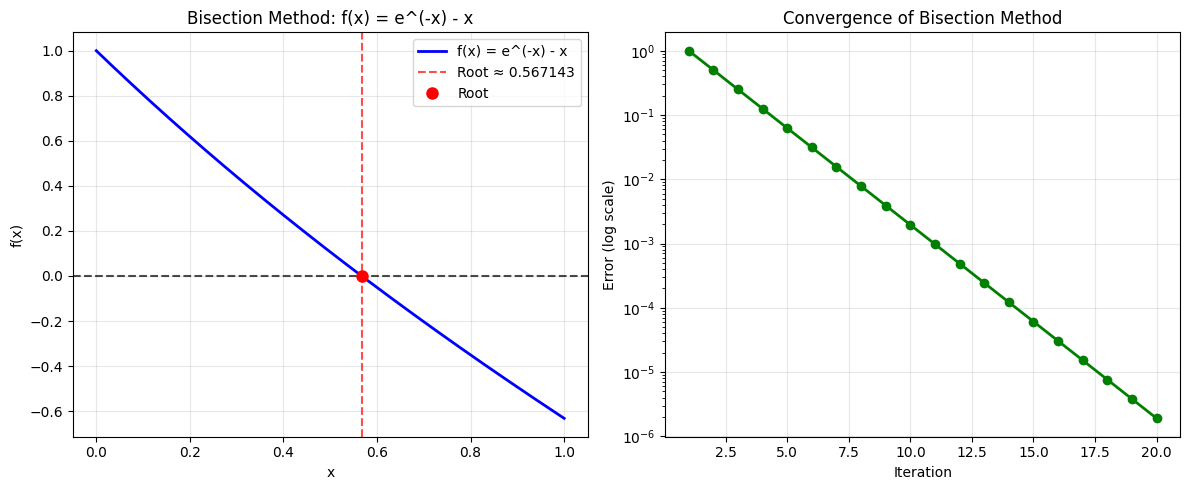


FINAL RESULTS:
Root: 0.56714344
Function value at root: -2.35e-07
Number of iterations: 20


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    """
    Bisection method to find root of f(x) = 0
    """
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    history = []

    print(f"{'Iteration':<10} {'a':<10} {'b':<10} {'c':<10} {'f(c)':<12} {'Error':<10}")
    print("-" * 70)

    for i in range(max_iter):
        c = (a + b) / 2
        fc = f(c)
        error = abs(b - a)

        history.append({
            'iteration': i + 1,
            'a': a,
            'b': b,
            'c': c,
            'f(c)': fc,
            'error': error
        })

        print(f"{i+1:<10} {a:<10.6f} {b:<10.6f} {c:<10.6f} {fc:<12.6f} {error:<10.6f}")

        if abs(fc) < tol or error < tol:
            print(f"\nConverged after {i+1} iterations!")
            break

        if f(a) * fc < 0:
            b = c
        else:
            a = c
    else:
        print(f"\nMaximum iterations reached without convergence")

    return c, history

# Define the function: f(x) = e^(-x) - x
def f(x):
    return np.exp(-x) - x

# Find root in interval [0, 1]
print("BISECTION METHOD: f(x) = e^(-x) - x")
print("=" * 50)

root, history = bisection_method(f, 0, 1, tol=1e-6)

print(f"\nApproximate root: {root:.8f}")
print(f"f(root) = {f(root):.2e}")

# Plotting
x_vals = np.linspace(0, 1, 400)
y_vals = f(x_vals)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = e^(-x) - x')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.7)
plt.axvline(x=root, color='r', linestyle='--', alpha=0.7, label=f'Root ≈ {root:.6f}')
plt.plot(root, f(root), 'ro', markersize=8, label='Root')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bisection Method: f(x) = e^(-x) - x')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
errors = [h['error'] for h in history]
iterations = [h['iteration'] for h in history]
plt.semilogy(iterations, errors, 'go-', linewidth=2, markersize=6)
plt.xlabel('Iteration')
plt.ylabel('Error (log scale)')
plt.title('Convergence of Bisection Method')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFINAL RESULTS:")
print(f"Root: {root:.8f}")
print(f"Function value at root: {f(root):.2e}")
print(f"Number of iterations: {len(history)}")